In [1]:
'''Explanation Video Link:- https://drive.google.com/file/d/12ipY2HMKhBFx1XTSSH3CjMbAzZiGWFzZ/view?usp=sharing'''

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv("FEV-data-Excel.xlsx .csv")
data.head()

,Car full name,Make,Model,Minimal price (gross) [PLN],Engine power [KM],Maximum torque [Nm],Type of brakes,Drive type,Battery capacity [kWh],Range (WLTP) [km],...,Permissable gross weight [kg],Maximum load capacity [kg],Number of seats,Number of doors,Tire size [in],Maximum speed [kph],Boot capacity (VDA) [l],Acceleration 0-100 kph [s],Maximum DC charging power [kW],mean - Energy consumption [kWh/100 km]
0,Audi e-tron 55 quattro,Audi,e-tron 55 quattro,345700,360,664,disc (front + rear),4WD,95.0,438,...,3130.0,640.0,5,5,19,200,660.0,5.7,150,24.45
1,Audi e-tron 50 quattro,Audi,e-tron 50 quattro,308400,313,540,disc (front + rear),4WD,71.0,340,...,3040.0,670.0,5,5,19,190,660.0,6.8,150,23.80
2,Audi e-tron S quattro,Audi,e-tron S quattro,414900,503,973,disc (front + rear),4WD,95.0,364,...,3130.0,565.0,5,5,20,210,660.0,4.5,150,27.55
3,Audi e-tron Sportback 50 quattro,Audi,e-tron Sportback 50 quattro,319700,313,540,disc (front + rear),4WD,71.0,346,...,3040.0,640.0,5,5,19,190,615.0,6.8,150,23.30
4,Audi e-tron Sportback 55 quattro,Audi,e-tron Sportback 55 quattro,357000,360,664,disc (front + rear),4WD,95.0,447,...,3130.0,670.0,5,5,19,200,615.0,5.7,150,23.85


In [3]:
#Task 1: A customer has a budget of 350,000 PLN and wants an EV with a minimum range of 400 km.

In [4]:
#1a) Your task is to filter out EVs that meet these criteria.

In [5]:
filterEVs=data[(data['Minimal price (gross) [PLN]'] <= 350000)&(data['Range (WLTP) [km]'] >= 400)]
print(filterEVs[['Car full name','Make', 'Model', 'Minimal price (gross) [PLN]', 'Range (WLTP) [km]']])

                        Car full name           Make  \
0              Audi e-tron 55 quattro           Audi   
8                             BMW iX3            BMW   
15        Hyundai Kona electric 64kWh        Hyundai   
18                   Kia e-Niro 64kWh            Kia   
20                   Kia e-Soul 64kWh            Kia   
22                  Mercedes-Benz EQC  Mercedes-Benz   
39  Tesla Model 3 Standard Range Plus          Tesla   
40           Tesla Model 3 Long Range          Tesla   
41          Tesla Model 3 Performance          Tesla   
47    Volkswagen ID.3 Pro Performance     Volkswagen   
48              Volkswagen ID.3 Pro S     Volkswagen   
49                Volkswagen ID.4 1st     Volkswagen   

                          Model  Minimal price (gross) [PLN]  \
0             e-tron 55 quattro                       345700   
8                           iX3                       282900   
15          Kona electric 64kWh                       178400   
18             

In [6]:
#1 b) Group them by the manufacturer (Make).

In [7]:
Makers=filterEVs.groupby('Make')

In [8]:
#1 c) Calculate the average battery capacity for each manufacturer.

In [9]:
avgBattery=Makers['Battery capacity [kWh]'].mean()
print(avgBattery)

Make
Audi             95.000000
BMW              80.000000
Hyundai          64.000000
Kia              64.000000
Mercedes-Benz    80.000000
Tesla            68.000000
Volkswagen       70.666667
Name: Battery capacity [kWh], dtype: float64


In [10]:
# Task 2: You suspect some EVs have unusually high or low energy consumption. Find the outliers in the mean- Energy consumption [kWh/100 km] column.

In [11]:
minn= data['mean - Energy consumption [kWh/100 km]'].min()
maxx = data['mean - Energy consumption [kWh/100 km]'].max()

outliers = data[(data['mean - Energy consumption [kWh/100 km]'] < minn) | (data['mean - Energy consumption [kWh/100 km]'] > maxx)]

print("Outliers in Energy Consumption:")
print(outliers[['Make', 'Model', 'mean - Energy consumption [kWh/100 km]']])


Outliers in Energy Consumption:
Empty DataFrame
Columns: [Make, Model, mean - Energy consumption [kWh/100 km]]
Index: []


In [12]:
# Task 3: Your manager wants to know if there's a strong relationship between battery capacity and range.

In [13]:
#3 a) Create a suitable plot to visualize.

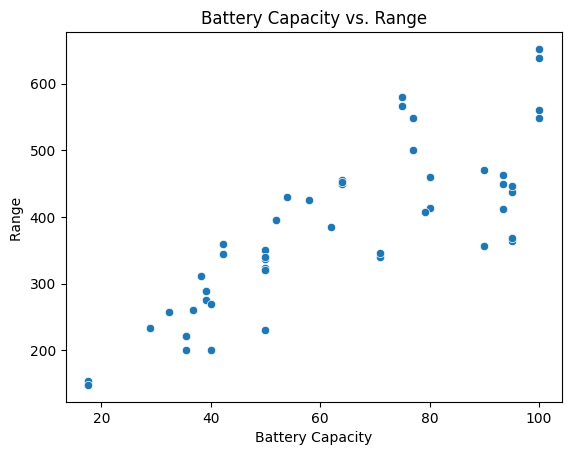

In [14]:
sns.scatterplot(x=data['Battery capacity [kWh]'], y=data['Range (WLTP) [km]'])
plt.title('Battery Capacity vs. Range')
plt.xlabel('Battery Capacity')
plt.ylabel('Range ')
plt.show()

In [15]:
#3b) Highlight any insights.

In [16]:
'''The scatter plot shows a positive correlation between battery capacity and range, indicating that
vehicles with larger batteries typically offer longer driving ranges.'''  

'The scatter plot shows a positive correlation between battery capacity and range, indicating that\nvehicles with larger batteries typically offer longer driving ranges.'

In [17]:
'''Task 4: Build an EV recommendation class. The class should allow users to input their budget,
 desired range, and battery capacity. The class should then return the top three EVs matching
 their criteria. '''

'Task 4: Build an EV recommendation class. The class should allow users to input their budget,\n desired range, and battery capacity. The class should then return the top three EVs matching\n their criteria. '

In [18]:
class EVRecommendation:
    def __init__(self, dataset):
        self.data = dataset

    def recommend(self, budget, min_range, min_battery_capacity):
        recommendations = self.data[
            (self.data['Minimal price (gross) [PLN]'] <= budget) &
            (self.data['Range (WLTP) [km]'] >= min_range) &
            (self.data['Battery capacity [kWh]'] >= min_battery_capacity)
        ]
        top_3 = recommendations.nlargest(3, 'Range (WLTP) [km]')
        return top_3[['Make', 'Model', 'Minimal price (gross) [PLN]', 'Range (WLTP) [km]', 'Battery capacity [kWh]']]


ev_rec = EVRecommendation(data)
print(ev_rec.recommend(350000, 350, 55))

          Make                Model  Minimal price (gross) [PLN]  \
40       Tesla   Model 3 Long Range                       235490   
41       Tesla  Model 3 Performance                       260490   
48  Volkswagen           ID.3 Pro S                       179990   

    Range (WLTP) [km]  Battery capacity [kWh]  
40                580                    75.0  
41                567                    75.0  
48                549                    77.0  


In [19]:
'''Task 5: Inferential Statistics– Hypothesis Testing: Test whether there is a significant difference
 in the average Engine power [KM] of vehicles manufactured by two leading manufacturers i.e.
 Tesla and Audi. What insights can you draw from the test results? Recommendations and
 Conclusion: Provide actionable insights based on your analysis.
 (Conduct a two sample t-test using ttest_ind from scipy.stats module) '''

'Task 5: Inferential Statistics– Hypothesis Testing: Test whether there is a significant difference\n in the average Engine power [KM] of vehicles manufactured by two leading manufacturers i.e.\n Tesla and Audi. What insights can you draw from the test results? Recommendations and\n Conclusion: Provide actionable insights based on your analysis.\n (Conduct a two sample t-test using ttest_ind from scipy.stats module) '

In [20]:
from scipy.stats import ttest_ind
tesla_power = data[data['Make'] == 'Tesla']['Engine power [KM]']
audi_power = data[data['Make'] == 'Audi']['Engine power [KM]']

t_stat, p_value = ttest_ind(tesla_power, audi_power, equal_var=False)

print("T-Statistic:", t_stat)
print("P-Value:", p_value)

if p_value < 0.05:
    print("There is a significant difference in average engine power between Tesla and Audi.")
else:
    print("There is no significant difference in average engine power between Tesla and Audi.")


T-Statistic: 1.7939951827297178
P-Value: 0.10684105068839565
There is no significant difference in average engine power between Tesla and Audi.


In [ ]:
'''Explanation Video Link:- https://drive.google.com/file/d/12ipY2HMKhBFx1XTSSH3CjMbAzZiGWFzZ/view?usp=sharing'''